# Phonon Polaritons in Hexagonal Boron Nitride (hBN)

This notebook explores the fascinating physics of phonon polaritons in hexagonal boron nitride (hBN), a 2D material with unique optical properties.

## What are Phonon Polaritons?

Phonon polaritons are hybrid light-matter quasiparticles that arise from the strong coupling between electromagnetic waves and optical phonons in polar materials. In hBN, these excitations occur in the mid-infrared spectral range and exhibit extreme field confinement.


## Key Properties of hBN

- **Crystal Structure**: Hexagonal lattice with alternating B and N atoms
- **Optical Phonons**: Two main branches - in-plane (TO) and out-of-plane (ZO)
- **Reststrahlen Bands**: Frequency ranges where the material behaves as a metal
- **Hyperbolic Dispersion**: Different optical properties along different crystal axes


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print("Ready to explore phonon polaritons in hBN")


Libraries imported successfully!
Ready to explore phonon polaritons in hBN


## Dielectric Function of hBN

The dielectric function of hBN can be described using a Lorentz oscillator model:

$$\varepsilon(\omega) = \varepsilon_{\infty} \left(1 + \frac{\omega_{TO}^2 - \omega_{LO}^2}{\omega_{TO}^2 - \omega^2 - i\gamma\omega}\right)$$

Where:
- $\varepsilon_{\infty}$ is the high-frequency dielectric constant
- $\omega_{TO}$ and $\omega_{LO}$ are the transverse and longitudinal optical phonon frequencies
- $\gamma$ is the damping parameter


In [11]:
# hBN material parameters (in-plane)
eps_inf = 4.9  # High-frequency dielectric constant
omega_TO = 1367  # TO phonon frequency (cm^-1)
omega_LO = 1610  # LO phonon frequency (cm^-1)
gamma = 5  # Damping parameter (cm^-1)

# Frequency range for calculations
omega = np.linspace(1200, 1700, 1000)  # cm^-1

def dielectric_function(omega, eps_inf, omega_TO, omega_LO, gamma):
    """Calculate the dielectric function of hBN"""
    numerator = omega_TO**2 - omega_LO**2
    denominator = omega_TO**2 - omega**2 - 1j * gamma * omega
    return eps_inf * (1 + numerator / denominator)

# Calculate dielectric function
eps = dielectric_function(omega, eps_inf, omega_TO, omega_LO, gamma)

print(f"hBN parameters:")
print(f"TO frequency: {omega_TO} cm⁻¹")
print(f"LO frequency: {omega_LO} cm⁻¹")
print(f"High-frequency ε: {eps_inf}")


hBN parameters:
TO frequency: 1367 cm⁻¹
LO frequency: 1610 cm⁻¹
High-frequency ε: 4.9


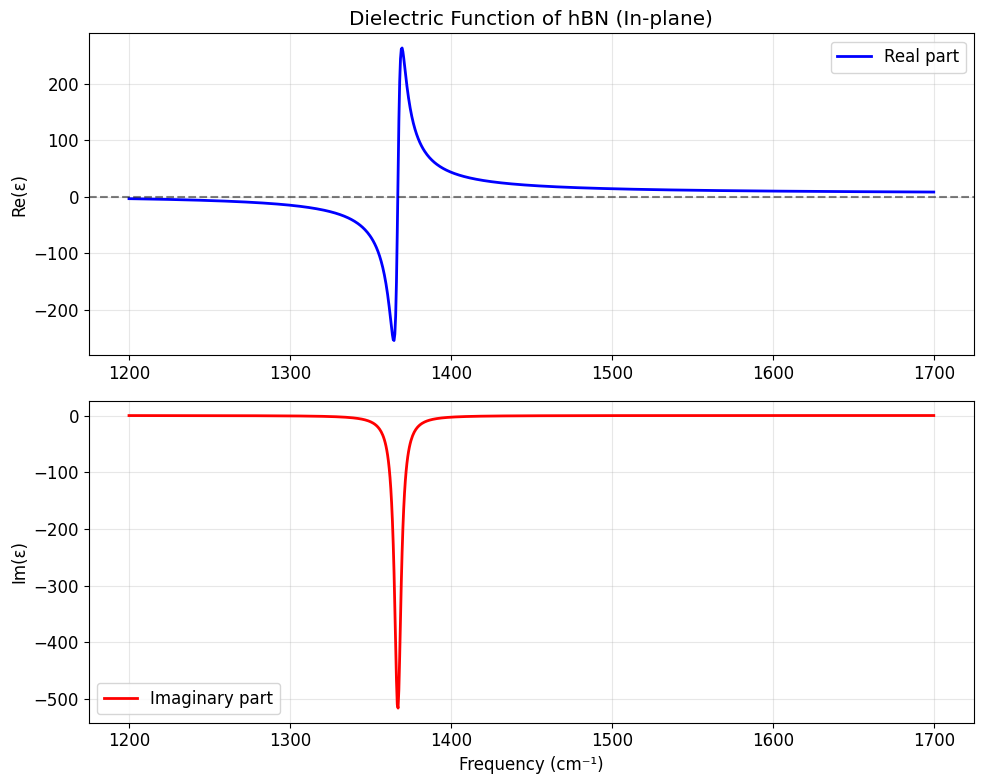


Reststrahlen band: 1200.0 - 1366.7 cm⁻¹


In [12]:
# Plot the dielectric function
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Real part
ax1.plot(omega, np.real(eps), 'b-', linewidth=2, label='Real part')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.set_ylabel('Re(ε)')
ax1.set_title('Dielectric Function of hBN (In-plane)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Imaginary part
ax2.plot(omega, np.imag(eps), 'r-', linewidth=2, label='Imaginary part')
ax2.set_xlabel('Frequency (cm⁻¹)')
ax2.set_ylabel('Im(ε)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Find Reststrahlen band (where Re(ε) < 0)
reststrahlen_mask = np.real(eps) < 0
if np.any(reststrahlen_mask):
    reststrahlen_freqs = omega[reststrahlen_mask]
    print(f"\nReststrahlen band: {reststrahlen_freqs[0]:.1f} - {reststrahlen_freqs[-1]:.1f} cm⁻¹")


## Phonon Polariton Dispersion

The dispersion relation for phonon polaritons in a thin hBN film can be derived from Maxwell's equations:

$$k = \frac{\omega}{c} \sqrt{\frac{\varepsilon(\omega)}{\varepsilon(\omega) + 1}}$$

This gives us the relationship between frequency and wavevector for the polariton modes.


In [13]:
# Calculate phonon polariton dispersion
c = 3e10  # Speed of light in cm/s

def polariton_dispersion(omega, eps):
    """Calculate the polariton wavevector"""
    # Avoid division by zero and negative values under square root
    ratio = eps / (eps + 1)
    # Only calculate for positive real part
    valid_mask = np.real(ratio) > 0
    k = np.zeros_like(omega, dtype=complex)
    k[valid_mask] = (omega[valid_mask] / c) * np.sqrt(ratio[valid_mask])
    return k

# Calculate dispersion
k_polariton = polariton_dispersion(omega, eps)

# Light line (k = ω/c)
k_light = omega / c

print("Phonon polariton dispersion calculated!")


Phonon polariton dispersion calculated!


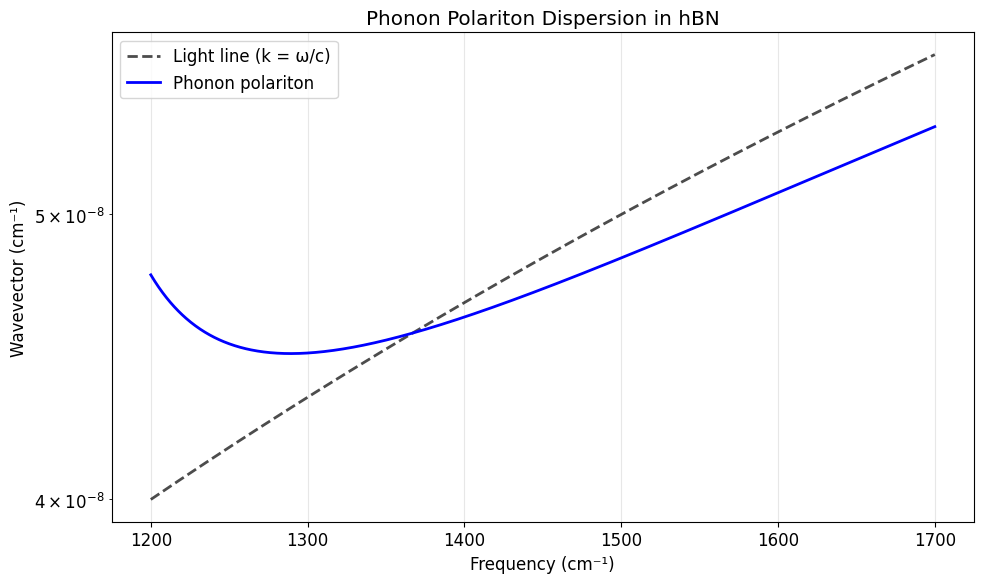

In [14]:
# Plot the dispersion relation
plt.figure(figsize=(10, 6))

# Plot light line
plt.plot(omega, k_light, 'k--', linewidth=2, label='Light line (k = ω/c)', alpha=0.7)

# Plot polariton dispersion (only real part)
valid_mask = np.real(k_polariton) > 0
plt.plot(omega[valid_mask], np.real(k_polariton[valid_mask]), 'b-', linewidth=2, label='Phonon polariton')

plt.xlabel('Frequency (cm⁻¹)')
plt.ylabel('Wavevector (cm⁻¹)')
plt.title('Phonon Polariton Dispersion in hBN')
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')

# Add annotations
plt.annotate('TO phonon', xy=(omega_TO, 0.1), xytext=(omega_TO-50, 0.2),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')
plt.annotate('LO phonon', xy=(omega_LO, 0.1), xytext=(omega_LO+50, 0.2),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

plt.tight_layout()
plt.show()


## Field Confinement and Enhancement

One of the most remarkable properties of phonon polaritons is their ability to confine electromagnetic fields to subwavelength dimensions. The confinement factor can be calculated as:

$$\text{Confinement} = \frac{\lambda_0}{\lambda_{eff}} = \frac{k}{k_0}$$

Where $\lambda_0$ is the free-space wavelength and $\lambda_{eff}$ is the effective wavelength of the polariton.


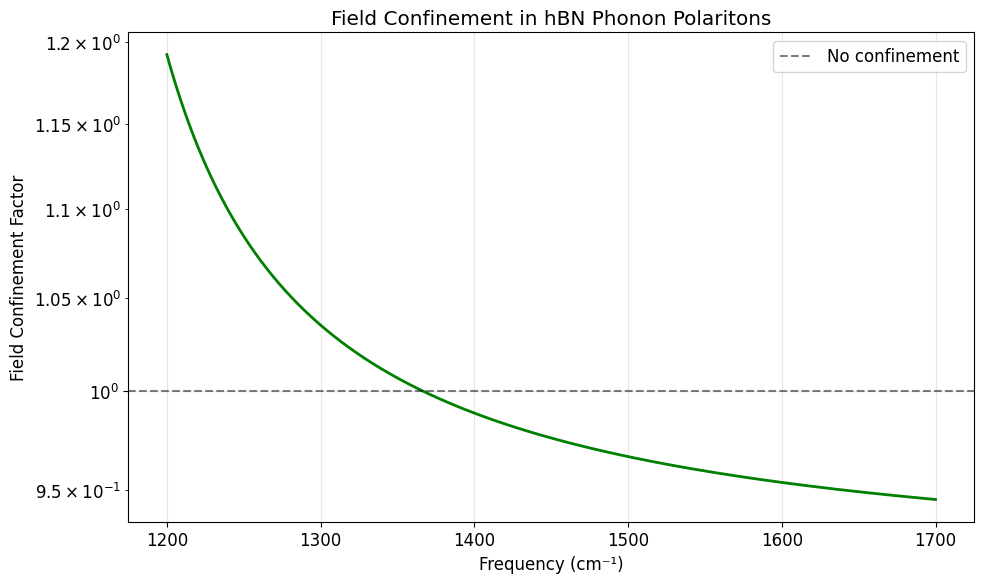

Maximum confinement: 1.2x at 1200.0 cm⁻¹


In [15]:
# Calculate field confinement
k0 = omega / c  # Free-space wavevector
confinement = np.abs(k_polariton / k0)

# Plot confinement factor
plt.figure(figsize=(10, 6))
valid_mask = np.real(k_polariton) > 0
plt.semilogy(omega[valid_mask], confinement[valid_mask], 'g-', linewidth=2)
plt.xlabel('Frequency (cm⁻¹)')
plt.ylabel('Field Confinement Factor')
plt.title('Field Confinement in hBN Phonon Polaritons')
plt.grid(True, alpha=0.3)

# Add horizontal line at confinement = 1
plt.axhline(y=1, color='k', linestyle='--', alpha=0.5, label='No confinement')
plt.legend()

plt.tight_layout()
plt.show()

# Find maximum confinement
max_confinement_idx = np.argmax(confinement[valid_mask])
max_confinement_freq = omega[valid_mask][max_confinement_idx]
max_confinement_value = confinement[valid_mask][max_confinement_idx]

print(f"Maximum confinement: {max_confinement_value:.1f}x at {max_confinement_freq:.1f} cm⁻¹")


## Applications and Future Directions

Phonon polaritons in hBN have numerous applications:

1. **Subwavelength Imaging**: Breaking the diffraction limit in the mid-infrared
2. **Enhanced Spectroscopy**: Boosting molecular vibrational signals
3. **Thermal Management**: Controlling heat transfer at the nanoscale
4. **Quantum Technologies**: Potential for quantum information processing
5. **Chemical Sensing**: Ultra-sensitive detection of molecular vibrations

### Key Advantages:
- **Low Losses**: hBN has relatively low optical losses
- **Tunability**: Properties can be modified by thickness and environment
- **Compatibility**: Works well with other 2D materials
- **Scalability**: Can be integrated into devices


In [16]:
# Summary of key results
print("=" * 50)
print("SUMMARY: Phonon Polaritons in hBN")
print("=" * 50)
print(f"TO phonon frequency: {omega_TO} cm⁻¹")
print(f"LO phonon frequency: {omega_LO} cm⁻¹")
print(f"Reststrahlen band: {omega_TO:.0f} - {omega_LO:.0f} cm⁻¹")
print(f"Maximum field confinement: {max_confinement_value:.1f}x")
print(f"Confinement frequency: {max_confinement_freq:.1f} cm⁻¹")
print("\nKey insight: Phonon polaritons enable subwavelength")
print("confinement of mid-infrared light in hBN!")
print("=" * 50)


SUMMARY: Phonon Polaritons in hBN
TO phonon frequency: 1367 cm⁻¹
LO phonon frequency: 1610 cm⁻¹
Reststrahlen band: 1367 - 1610 cm⁻¹
Maximum field confinement: 1.2x
Confinement frequency: 1200.0 cm⁻¹

Key insight: Phonon polaritons enable subwavelength
confinement of mid-infrared light in hBN!


## Collaboration Test

This notebook is designed to test team collaboration features in Cursor. Team members can:

1. **Edit cells simultaneously** - Try modifying the material parameters
2. **Add new analysis** - Create additional cells for different calculations
3. **Share insights** - Add markdown cells with observations
4. **Experiment together** - Test different frequency ranges or parameters

### Try these collaborative exercises:
- Change the damping parameter `gamma` and observe the effects
- Add calculations for out-of-plane phonon modes
- Create visualizations for different hBN thicknesses
- Compare with other 2D materials like graphene or MoS₂


## 🧪 COLLABORATION TEST CELL

**Instructions for Sergi:**
1. Change the value below from "TEST_VALUE" to "SERGI_WAS_HERE"
2. Add your name and timestamp
3. Save the cell

**Current value:** TEST_VALUE

**Your changes here:** [Sergi, please edit this line]


Hey